In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt
import locale

In [2]:
df = pd.read_csv("fifa21 raw data v2.csv")

/var/folders/p1/7_hkttsj4778r4_my2lprjs00000gn/T/ipykernel_89241/1369213445.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fifa21 raw data v2.csv")


# Data manipulation

In [3]:
df.drop(["photoUrl", "playerUrl"], axis=1, inplace=True)

In [4]:
df.head(5)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5 ★,91,85,86,94,36,59,595


In [5]:
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [6]:
df.head(5)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,...,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,...,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,...,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,...,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,...,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [7]:
#Converting all the rows to numerical, and converting all measures to cm
df["Height"] = df["Height"].str.replace("cm", "")

In [8]:
df["Height"] = df["Height"].str.replace("'", ".")
df["Height"] = df["Height"].str.replace('"', "")

In [9]:
df["Height"].value_counts()

Height
180    1474
178    1250
185    1182
183    1148
175    1091
       ... 
6.5       1
157       1
5.4       1
5.6       1
155       1
Name: count, Length: 62, dtype: int64

In [10]:
#Changing the type to float
df["Height"] = df["Height"].astype(float)

In [11]:
#Changing the ft to kg 
df["new_height"] = df["Height"].apply(lambda x: (30.48 * x) if x < 10 else x)

In [12]:
df["Height"] = df["new_height"].round(1)

In [13]:
df.drop("new_height", axis=1, inplace=True)

In [14]:
#Removing the newline characters \n from columns that have it
df["Club"] = df["Club"].str.replace("\n", "")

In [15]:
df.head(5)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,...,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187.0,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,...,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188.0,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,...,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,...,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,...,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [16]:
#Changing the format of the date
df["Joined_2"] = pd.to_datetime(df["Joined"], format='%b %d, %Y')

In [17]:
df["Joined_2"] = df["Joined_2"].dt.strftime("%d/%m/%Y")

In [18]:
df["Joined_2"] = pd.to_datetime(df["Joined_2"], format="%d/%m/%Y")

In [19]:
#Calculating the total years in a club 
df["total_years"] = df["Joined_2"].apply(lambda x: (dt.datetime.now() - x).days)

In [20]:
df["total_years"] = (df["total_years"] / 365.2).astype(int) #accounting for the leap year

In [21]:
df.head(5)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Joined_2,total_years
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,...,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004-07-01,19
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187.0,83kg,Right,92,ST,"Jul 10, 2018",NaN,€63M,€220K,€75.9M,437,84,95,90,82,...,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018-07-10,5
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188.0,87kg,Right,91,GK,"Jul 16, 2014",NaN,€120M,€125K,€159.4M,95,13,11,15,43,...,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014-07-16,9
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70kg,Right,91,CAM,"Aug 30, 2015",NaN,€129M,€370K,€161M,407,94,82,55,94,...,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,2015-08-30,8
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68kg,Right,91,LW,"Aug 3, 2017",NaN,€132M,€270K,€166.5M,408,85,87,62,87,...,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017-08-03,6


In [22]:

df.drop("Joined_2", axis=1, inplace=True)

In [23]:
#Players being in the club for more than 10 years
df[df["total_years"] > 10]

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,total_years
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72kg,Left,93,RW,"Jul 1, 2004",NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,...,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,19
14,167495,M. Neuer,Manuel Neuer,Germany,34,89,89,FC Bayern München,2011 ~ 2023,GK,193.0,92kg,Right,89,GK,"Jul 1, 2011",NaN,€17.5M,€130K,€47.9M,119,15,13,25,55,...,38,17,10,11,440,87,87,91,86,89,1515,497,4 ★,1★,Medium,Medium,5 ★,87,87,91,89,57,86,118,12
15,165153,K. Benzema,Karim Benzema,France,32,89,89,Real Madrid,2009 ~ 2022,"CF, ST",185.0,81kg,Right,89,CF,"Jul 9, 2009",NaN,€83.5M,€350K,€108.7M,426,75,88,91,86,...,89,47,24,18,41,13,11,5,5,7,2111,442,4 ★,4★,Medium,Low,4 ★,74,85,81,86,40,76,216,14
16,155862,Sergio Ramos,Sergio Ramos García,Spain,34,89,89,Real Madrid,2005 ~ 2021,CB,184.0,82kg,Right,89,CB,"Aug 1, 2005",NaN,€33.5M,€300K,€50.2M,374,66,65,92,82,...,263,85,88,90,46,11,8,9,7,11,2258,463,3 ★,3★,High,Medium,4 ★,71,70,76,73,88,85,212,18
17,153079,S. Agüero,Sergio Agüero,Argentina,32,89,89,Manchester City,2011 ~ 2021,ST,173.0,70kg,Right,89,ST,"Jul 28, 2011",NaN,€83.5M,€300K,€98.1M,411,70,94,78,83,...,83,30,29,24,59,13,15,6,11,14,2118,439,4 ★,4★,High,Medium,4 ★,78,90,77,88,33,73,154,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17021,256950,J. Huysman,Jérémy Huysman,France,31,57,57,USL Dunkerque,2011 ~ 2021,"CB, CDM",188.0,84kg,Right,57,CB,"Jul 16, 2011",NaN,€110K,€1K,€140K,152,23,24,50,29,...,182,59,65,58,51,11,9,10,14,7,1226,261,3 ★,2★,Medium,Medium,1 ★,49,26,30,30,59,67,NaN,12
17032,247196,Luo Yi,Yi Luo,China PR,33,57,57,Wuhan Zall,2012 ~ 2020,"LB, RB",175.0,64kg,Right,57,LB,"Jan 1, 2012",NaN,€90K,€2K,€70K,256,56,48,42,57,...,158,53,53,52,52,8,14,10,14,6,1538,327,4 ★,2★,Medium,Medium,1 ★,65,48,54,56,52,52,NaN,12
17073,102881,K. Stamatopoulos,Kyriakos Stamatopoulos,Canada,40,57,57,AIK,2011 ~ 2020,GK,188.0,80kg,Left,57,GK,"Jan 1, 2011",NaN,€20K,€600,€13K,88,17,12,14,36,...,31,12,9,10,276,57,52,54,57,56,1026,309,2 ★,1★,Medium,Medium,1 ★,57,52,54,56,33,57,NaN,13
17186,182037,Yao Hanlin,Hanlin Yao,China PR,35,56,56,Wuhan Zall,2010 ~ 2020,"CM, RW, RM",175.0,60kg,Right,57,CAM,"Jan 1, 2010",NaN,€60K,€1K,€62K,276,63,52,38,64,...,129,51,38,40,56,12,12,8,13,11,1578,318,4 ★,2★,Medium,Medium,1 ★,47,57,62,55,44,53,NaN,14


In [24]:
def convert_to_number(value): 
    if "K" in value: 
        return float(value.replace("K", "")) * 1000
    elif "M" in value: 
        return float(value.replace("M", "")) * 1000000
    else:
        return float(value)

In [25]:
#Removing the euro sign so we can make it numerical
df["Value"] = df["Value"].str.replace("€", "")
df["Value"] = df["Value"].apply(convert_to_number)

In [26]:
#Removing the euro sign so we can make it numerical
df["Wage"] = df["Wage"].str.replace("€", "")
df["Wage"] = df["Wage"].apply(convert_to_number)

In [27]:
df.head(5)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,total_years
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72kg,Left,93,RW,"Jul 1, 2004",NaN,103500000.0,560000.0,€138.4M,429,85,95,70,91,...,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,19
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187.0,83kg,Right,92,ST,"Jul 10, 2018",NaN,63000000.0,220000.0,€75.9M,437,84,95,90,82,...,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,5
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188.0,87kg,Right,91,GK,"Jul 16, 2014",NaN,120000000.0,125000.0,€159.4M,95,13,11,15,43,...,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,9
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70kg,Right,91,CAM,"Aug 30, 2015",NaN,129000000.0,370000.0,€161M,407,94,82,55,94,...,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,8
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68kg,Right,91,LW,"Aug 3, 2017",NaN,132000000.0,270000.0,€166.5M,408,85,87,62,87,...,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,6


In [28]:
#Removing the stars to make it numerical
df["W/F"] = df["W/F"].str.replace("★", "")
df["IR"] = df["IR"].str.replace("★", "")
df["SM"] = df["SM"].str.replace("★", "")

In [29]:
#Converting it to numerical
df["W/F"] = df["W/F"].astype(int)
df["IR"] = df["IR"].astype(int)
df["SM"] = df["SM"].astype(int)

In [30]:
df["Weight"] = df["Weight"].str.replace("kg", "")

In [31]:
df.loc[df["Weight"].str.contains("lbs")]

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,total_years
793,110677,Moyá,Miguel Ángel Moyá Rumbo,Spain,36,78,78,Real Sociedad,2018 ~ 2021,GK,189.0,183lbs,Right,78,GK,"Feb 27, 2018",NaN,1700000.0,15000.0,€3.6M,78,11,11,12,31,...,43,15,14,14,391,82,72,80,79,78,1216,430,2,1,Medium,Medium,2,82,72,80,78,39,79,14,5
847,166706,M. Škrtel,Martin Škrtel,Slovakia,35,78,78,Medipol Başakşehir FK,2020 ~ 2021,CB,192.0,179lbs,Right,78,CB,"Aug 20, 2020",NaN,3100000.0,26000.0,€5.9M,263,39,35,83,63,...,233,77,79,77,44,15,5,7,6,11,1600,344,2,2,Medium,High,3,47,38,48,51,78,82,22,3
848,189068,B. Dost,Bas Dost,Netherlands,31,78,78,Eintracht Frankfurt,2019 ~ 2022,ST,198.1,183lbs,Right,78,ST,"Aug 26, 2019",NaN,9500000.0,33000.0,€16.2M,369,38,84,92,73,...,129,38,65,26,52,6,12,15,11,8,1774,380,3,2,Medium,Medium,3,47,81,57,65,51,79,33,4
860,198031,Sérgio Oliveira,Sérgio Miguel Relvas de Oliveira,Portugal,28,78,78,FC Porto,2015 ~ 2021,CM,155.8,172lbs,Right,78,CM,"Jul 1, 2015",NaN,10500000.0,16000.0,€21M,375,80,69,64,84,...,186,71,67,48,50,9,9,11,11,10,2067,426,3,3,Medium,High,1,58,77,82,75,66,68,41,8
861,190243,M. Hitz,Marwin Hitz,Switzerland,32,78,78,Borussia Dortmund,2018 ~ 2021,GK,195.1,196lbs,Right,78,GK,"Jul 1, 2018",NaN,6500000.0,39000.0,€11.1M,112,12,27,18,29,...,42,13,15,14,378,79,77,63,79,80,1203,422,3,1,Medium,Medium,2,79,77,63,80,44,79,17,5
862,194222,Laguardia,Víctor Laguardia Cisneros,Spain,30,78,78,Deportivo Alavés,2014 ~ 2022,CB,185.9,176lbs,Right,78,CB,"Jul 11, 2014",NaN,8500000.0,25000.0,€17.9M,265,43,49,74,70,...,238,82,80,76,58,14,12,13,9,10,1692,361,3,2,Medium,High,1,51,46,55,51,80,78,3,9
863,194209,Y. El Arabi,Youssef El Arabi,Morocco,33,78,78,Olympiacos CFP,2019 ~ 2021,ST,182.9,185lbs,Right,78,ST,"Jul 6, 2019",NaN,6500000.0,500.0,€13.7M,375,61,84,76,69,...,97,25,30,42,50,6,16,11,6,11,1950,404,4,3,High,Medium,2,71,81,67,78,37,70,8,4
864,193601,G. Pezzella,Germán Pezzella,Argentina,29,78,78,Fiorentina,2018 ~ 2022,CB,185.9,179lbs,Right,78,CB,"Jul 1, 2018",NaN,8500000.0,50000.0,€14.5M,274,40,48,82,64,...,238,78,82,78,54,7,9,13,10,15,1666,360,3,2,Medium,Medium,1,54,49,47,56,80,74,20,5
865,193352,R. Rodríguez,Ricardo Rodríguez,Switzerland,27,78,78,Torino,2020 ~ 2024,LB,155.8,170lbs,Left,78,LB,"Aug 19, 2020",NaN,9000000.0,41000.0,€15.3M,346,82,58,64,76,...,233,78,78,77,66,14,13,14,14,11,2128,439,3,3,Medium,Medium,3,71,67,76,74,77,74,36,3
866,193152,Herrerín,Iago Herrerín Buisán,Spain,32,78,78,Athletic Club de Bilbao,2012 ~ 2021,GK,189.0,196lbs,Right,78,GK,"Jul 1, 2012",NaN,6500000.0,19000.0,€13.7M,72,14,13,14,16,...,44,16,16,12,392,80,78,83,77,74,1268,435,3,1,Medium,Medium,1,80,78,83,74,43,77,11,11


In [32]:
#Converting lbs to kg
mask = df["Weight"].str.contains("lbs")
lbs_to_kg = 0.45359237
df.loc[mask, "Weight"] = (df.loc[mask, "Weight"].str.replace("lbs", "").astype(float) * lbs_to_kg)

In [33]:
#Double checking if the values are right
df.loc[df["Name"] == "Moyá"]

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,total_years
793,110677,Moyá,Miguel Ángel Moyá Rumbo,Spain,36,78,78,Real Sociedad,2018 ~ 2021,GK,189.0,83.007404,Right,78,GK,"Feb 27, 2018",NaN,1700000.0,15000.0,€3.6M,78,11,11,12,31,...,43,15,14,14,391,82,72,80,79,78,1216,430,2,1,Medium,Medium,2,82,72,80,78,39,79,14,5


In [34]:
df["Weight"]= df["Weight"].astype(int)

# Exploratory data analysis

Text(0, 0.5, 'Value in Euros')

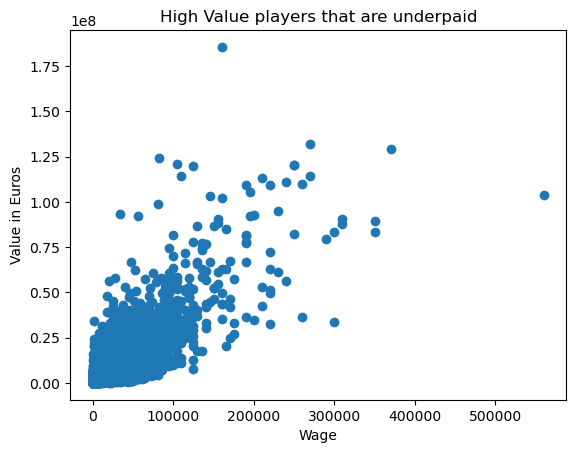

In [35]:
plt.scatter(df["Wage"],df["Value"])
plt.title("High Value players that are underpaid")
plt.xlabel("Wage")
plt.ylabel("Value in Euros")



In [36]:
#One of the most valuable and underpaid players 
df.loc[(df["Value"] > 175000000) & (df["Wage"] < 200000)]

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,total_years
8,231747,K. Mbappé,Kylian Mbappé,France,21,90,95,Paris Saint-Germain,2018 ~ 2022,"ST, LW, RW",178.0,73,Right,91,ST,"Jul 1, 2018",NaN,185500000.0,160000.0,€203.1M,408,78,91,73,83,...,100,34,34,32,42,13,5,7,11,6,2147,466,4,5,High,Low,3,96,86,78,91,39,76,1.6K,5


In [37]:
#Highest paid athletes 
top_10 = df.sort_values(by="Wage", ascending=False).head(10)
top_10

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,total_years
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170.0,72,Left,93,RW,"Jul 1, 2004",NaN,103500000.0,560000.0,€138.4M,429,85,95,70,91,...,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,19
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181.0,70,Right,91,CAM,"Aug 30, 2015",NaN,129000000.0,370000.0,€161M,407,94,82,55,94,...,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,8
26,183277,E. Hazard,Eden Hazard,Belgium,29,88,88,Real Madrid,2019 ~ 2024,"LW, ST",175.0,74,Right,88,LW,"Jul 1, 2019",NaN,89500000.0,350000.0,€118.9M,388,77,82,61,85,...,83,34,27,22,45,11,12,6,8,8,2105,446,4,4,High,Medium,4,88,82,83,92,35,66,246,4
15,165153,K. Benzema,Karim Benzema,France,32,89,89,Real Madrid,2009 ~ 2022,"CF, ST",185.0,81,Right,89,CF,"Jul 9, 2009",NaN,83500000.0,350000.0,€108.7M,426,75,88,91,86,...,89,47,24,18,41,13,11,5,5,7,2111,442,4,4,Medium,Low,4,74,85,81,86,40,76,216,14
12,200145,Casemiro,Carlos Henrique Venancio Casimiro,Brazil,28,89,89,Real Madrid,2013 ~ 2023,CDM,185.0,84,Right,89,CDM,"Jul 11, 2013",NaN,90500000.0,310000.0,€122M,349,58,64,80,84,...,259,84,88,87,67,13,14,16,12,12,2220,463,3,2,High,High,3,65,73,76,72,86,91,175,10
27,182521,T. Kroos,Toni Kroos,Germany,30,88,88,Real Madrid,2014 ~ 2023,CM,183.0,76,Right,88,CM,"Jul 17, 2014",NaN,87500000.0,310000.0,€112.8M,397,88,76,58,93,...,205,72,73,60,51,10,11,13,7,10,2150,447,5,3,Medium,Medium,4,54,81,91,81,71,69,161,9
17,153079,S. Agüero,Sergio Agüero,Argentina,32,89,89,Manchester City,2011 ~ 2021,ST,173.0,70,Right,89,ST,"Jul 28, 2011",NaN,83500000.0,300000.0,€98.1M,411,70,94,78,83,...,83,30,29,24,59,13,15,6,11,14,2118,439,4,4,High,Medium,4,78,90,77,88,33,73,154,12
16,155862,Sergio Ramos,Sergio Ramos García,Spain,34,89,89,Real Madrid,2005 ~ 2021,CB,184.0,82,Right,89,CB,"Aug 1, 2005",NaN,33500000.0,300000.0,€50.2M,374,66,65,92,82,...,263,85,88,90,46,11,8,9,7,11,2258,463,3,3,High,Medium,4,71,70,76,73,88,85,212,18
28,194765,A. Griezmann,Antoine Griezmann,France,29,87,87,FC Barcelona,2019 ~ 2024,"ST, CF, LW",176.0,73,Left,87,ST,"Jul 12, 2019",NaN,79500000.0,290000.0,€103.5M,425,83,88,83,84,...,162,59,54,49,63,14,8,14,13,14,2288,465,3,4,Medium,Medium,4,79,85,84,88,57,72,396,4
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175.0,68,Right,91,LW,"Aug 3, 2017",NaN,132000000.0,270000.0,€166.5M,408,85,87,62,87,...,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,6


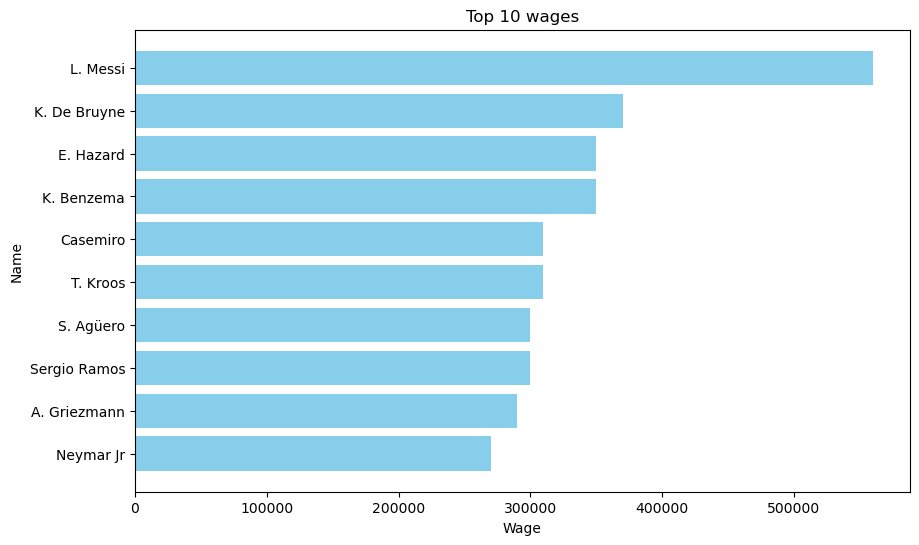

In [38]:
plt.figure(figsize=(10, 6))
plt.barh(top_10["Name"], top_10["Wage"], color="skyblue")
plt.xlabel("Wage")
plt.ylabel("Name")
plt.title("Top 10 wages")
plt.gca().invert_yaxis() #Inverting y-axisto have the highest wage on top
plt.show();

In [39]:
#Top 10 highest players 
top_10_height = df.sort_values(by="Height", ascending=False).head(10)
top_10_height

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,...,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,total_years
10333,199321,T. Holý,Tomáš Holý,Czech Republic,28,65,67,Ipswich Town,2019 ~ 2022,GK,206.0,102,Right,65,GK,"Jul 1, 2019",NaN,600000.0,3000.0,€867K,87,13,18,18,18,...,66,16,25,25,318,68,60,56,65,69,1041,346,3,1,Medium,Medium,1,68,60,56,69,28,65,16,4
10860,225050,A. Ba,Abdoul Ba,Mauritania,26,64,67,AJ Auxerre,2017 ~ 2025,CB,203.0,94,Left,66,CB,"Jun 15, 2017",NaN,675000.0,2000.0,€938K,228,35,30,72,59,...,189,62,65,62,60,9,11,13,12,15,1341,299,2,2,Low,Low,1,43,33,42,41,64,76,18,6
4103,192613,C. Pantilimon,Costel Pantilimon,Romania,33,71,71,Denizlispor,2020 ~ 2022,GK,203.0,96,Right,71,GK,"Sep 6, 2020",NaN,600000.0,12000.0,€2.6M,97,19,11,16,38,...,52,16,19,17,352,67,71,72,70,72,1146,389,2,1,Medium,Medium,1,67,71,72,72,37,70,8,3
18189,237127,D. Thiam,Demba Thiam,Senegal,22,53,65,SPAL,2016 ~ 2023,GK,202.0,87,Right,53,GK,"Mar 9, 2016",NaN,200000.0,3000.0,€180K,49,8,6,13,17,...,49,25,13,11,279,53,52,62,61,51,903,333,1,1,Medium,Medium,1,53,52,62,51,54,61,NaN,7
11200,179549,S. Maierhofer,Stefan Maierhofer,Austria,37,64,64,FC Admira Wacker Mödling,2020 ~ 2021,ST,202.0,98,Right,64,ST,"Aug 7, 2020",NaN,200000.0,2000.0,€232K,306,43,65,84,51,...,133,45,49,39,58,14,12,15,6,11,1542,316,2,2,Medium,Low,1,30,68,51,43,50,74,14,3
6441,224836,V. Milinković-Savić,Vanja Milinković-Savić,Serbia,23,68,74,Torino,2017 ~ 2021,GK,202.0,92,Right,68,GK,"Jul 1, 2017",NaN,1500000.0,10000.0,€1.8M,97,18,20,12,31,...,45,11,15,19,346,67,66,78,67,68,1297,389,3,1,Medium,Medium,1,67,66,78,68,43,67,15,6
8280,243675,K. Scherpen,Kjell Scherpen,Netherlands,20,67,81,Ajax,2019 ~ 2023,GK,202.0,85,Right,67,GK,"Jul 1, 2019",NaN,2100000.0,3000.0,€2.8M,64,11,9,10,26,...,35,14,11,10,332,67,66,64,66,69,1019,374,5,1,Medium,Medium,1,67,66,64,69,42,66,72,4
8817,197981,S. Makienok,Simon Makienok,Denmark,29,66,66,FC St. Pauli,2020 ~ 2022,ST,201.0,94,Right,66,ST,"Aug 29, 2020",NaN,850000.0,6000.0,€1M,307,30,66,82,63,...,71,34,18,19,54,12,8,16,12,6,1517,318,2,2,Medium,Medium,1,35,67,49,59,31,77,12,3
9689,242200,T. Rönning,Tim Rönning,Sweden,21,65,74,IF Elfsborg,2018 ~ 2021,GK,201.0,88,Right,65,GK,"Jan 1, 2018",NaN,1400000.0,800.0,€943K,100,15,10,10,45,...,37,16,10,11,329,65,67,63,65,69,1051,347,3,1,Medium,Medium,1,65,67,63,69,18,65,4,6
1373,172203,F. Forster,Fraser Forster,England,32,76,76,Southampton,2014 ~ 2022,GK,201.0,93,Right,76,GK,"Aug 9, 2014",NaN,3700000.0,36000.0,€8.9M,91,19,13,13,27,...,36,11,13,12,368,76,72,65,75,80,1215,399,5,1,Medium,Medium,2,76,72,65,80,31,75,29,9


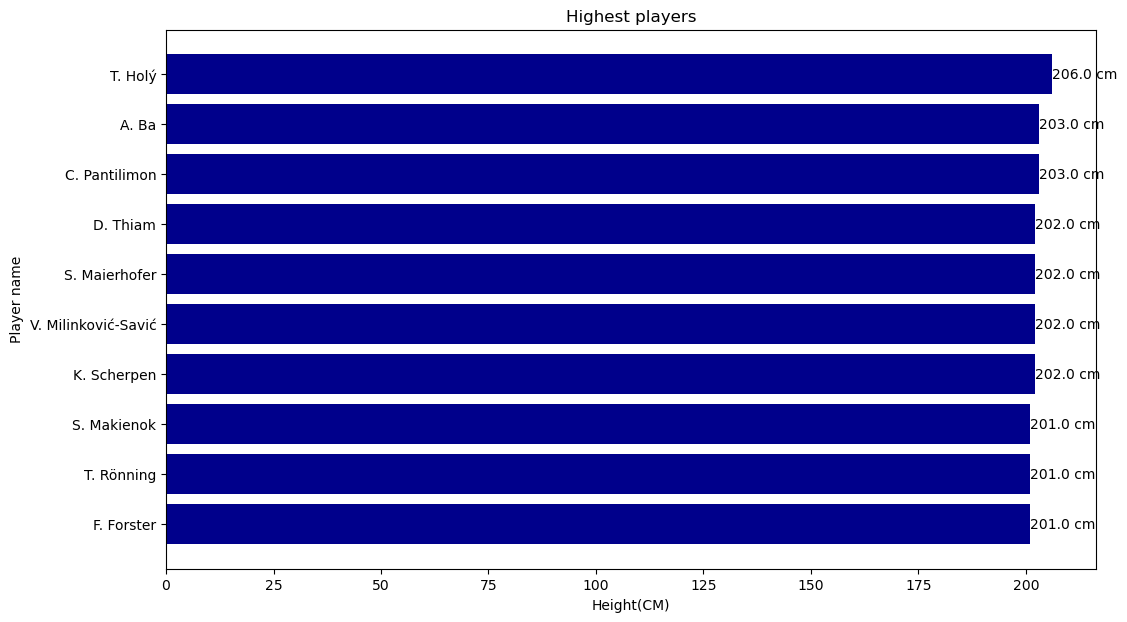

In [40]:
plt.figure(figsize=(12, 7))
bars = plt.barh(top_10_height["Name"], top_10_height["Height"], color="darkblue")
for bar in bars: 
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
            f"{bar.get_width()} cm", #Label text 
            va="center", ha="left")
plt.title("Highest players")
plt.xlabel("Height(CM)")
plt.ylabel("Player name")
plt.gca().invert_yaxis() #Inverting y-axisto have the highest wage on top
plt.show();

In [41]:
#Players with most weight 
top_weight = df.sort_values(by="Weight", ascending=False).head(10)

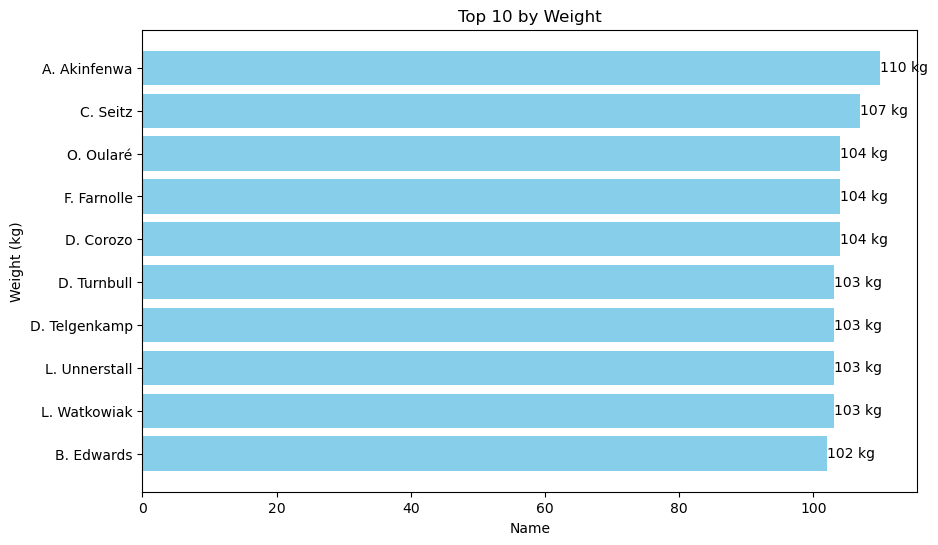

In [42]:
plt.figure(figsize=(10,6))
bars = plt.barh(top_weight["Name"], top_weight["Weight"], color="skyblue")
for bar in bars: 
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
            f"{bar.get_width()} kg", #Label text 
            va="center", ha="left")
plt.title("Top 10 by Weight")
plt.xlabel("Name")
plt.ylabel("Weight (kg)")
plt.gca().invert_yaxis() #Inverting y-axisto have the highest wage on top
plt.show()

In [43]:
#Top 10 highest Value left fotters
top_left = df[df["Preferred Foot"] == "Left"].sort_values(by="Value", ascending=False).head(10)

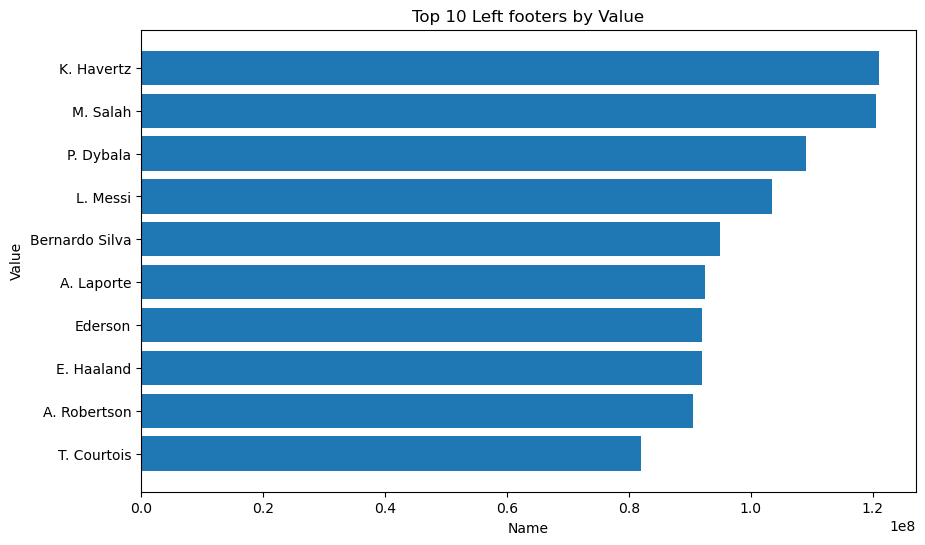

In [44]:
plt.figure(figsize=(10,6))
plt.barh(top_left["Name"], top_left["Value"])
plt.title("Top 10 Left footers by Value")
plt.xlabel("Name")
plt.ylabel("Value")
plt.gca().invert_yaxis() #Inverting y-axisto have the highest wage on top
plt.show();

/Users/filipblatancic/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


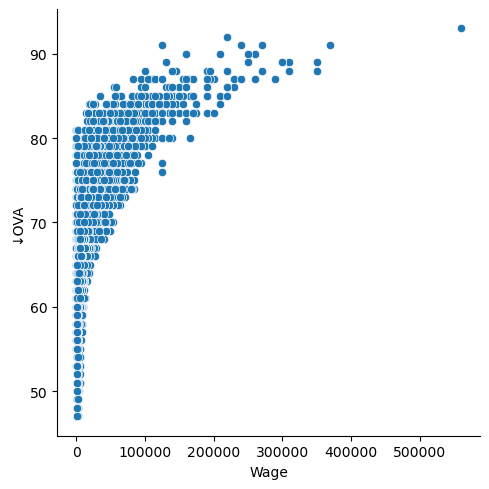

In [45]:
sns.relplot(data=df, x="Wage", y="↓OVA");